In [12]:
import torch
import numpy as np
torch.__version__

'2.1.0+cpu'

In [14]:
x = torch.randn((2,3,1,10,10))

print(x.shape)
x.squeeze().shape
x.unsqueeze(dim=4).shape

x = torch.arange(0,100).reshape((2,5,10))
print(x)

torch.Size([2, 3, 1, 10, 10])
tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
iris['data'].shape, iris['data'].dtype
iris['feature_names']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

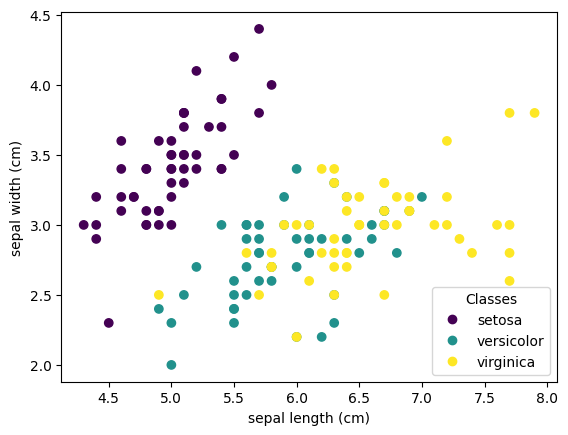

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

scatter = ax.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

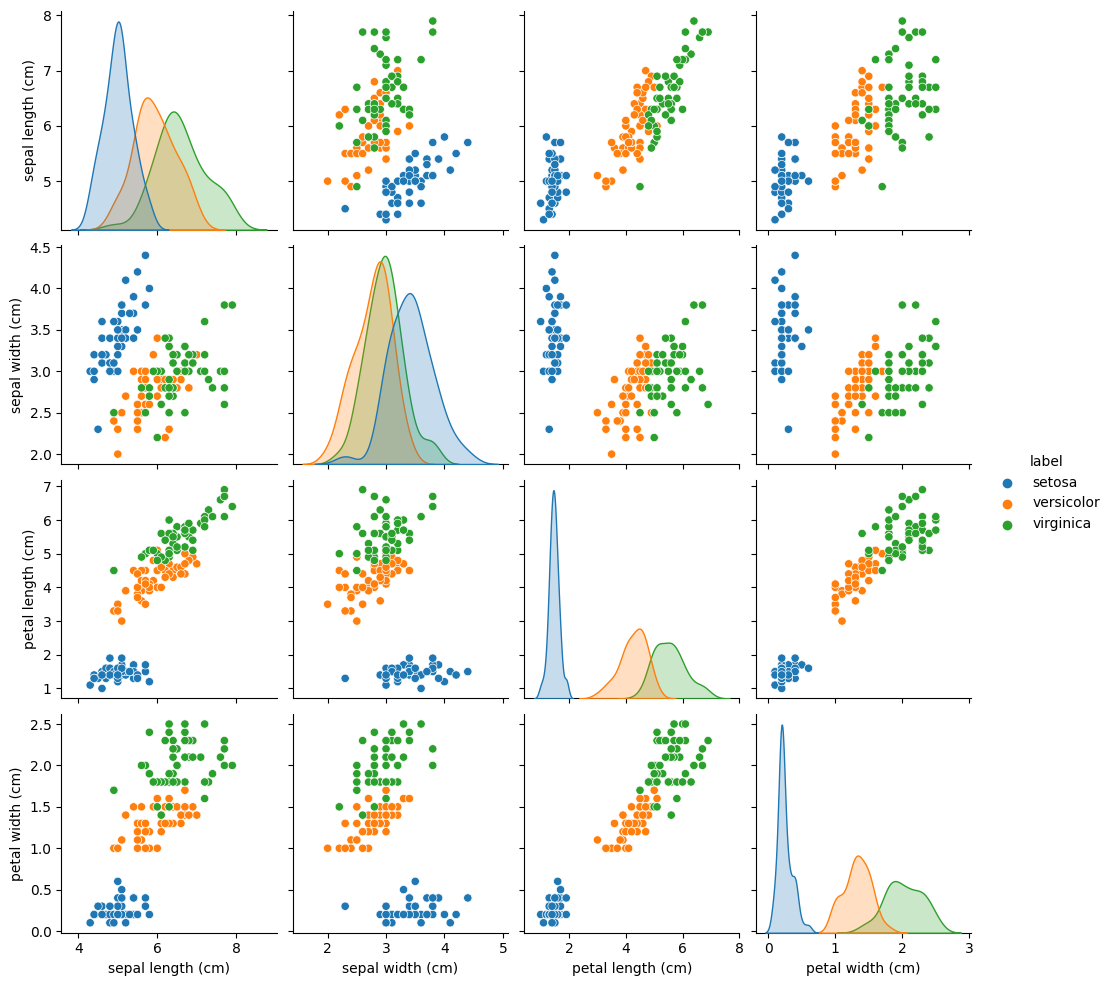

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd

features_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
features_df['label'] = iris['target_names'][iris['target']]
sns.pairplot(features_df, hue='label')

In [ ]:
from tables.tests.common import test_filename
from sklearn.model_selection import train_test_split

preprocessed_features = (iris['data'] - iris['data'].mean(axis=0))/ iris['data'].std(axis=0)

labels = iris['target']

train_features, test_features, train_labels, test_labels = train_test_split(preprocessed_features, labels)

In [ ]:
features = {
    'train': torch.tensor(train_features, dtype=torch.float32),
    'test' : torch.tensor(test_features, dtype=torch.float32),
}
labels = {
    'train': torch.tensor(train_labels, dtype=torch.long),
    'test' : torch.tensor(test_labels, dtype=torch.long),
}


In [ ]:
from torch import nn
from torch.nn import functional as F
from typing import Callable

class MLP(nn.Module):
  def __init__(self,
               input_size:int,
               hidden_layer_size:int,
               output_size:int,
               activation_fn:Callable[[torch.Tensor],torch.Tensor]= F.relu):
    super().__init__()
    self.l1 = nn.Linear(input_size, hidden_layer_size)
    self.l2 = nn.Linear(hidden_layer_size, output_size)
    self.activation_fn = activation_fn

  def forward(self, inputs:torch.Tensor) -> torch.Tensor:
    x = self.l1(inputs)
    x = self.activation_fn(x)
    x = self.l2(x)
    return x

In [ ]:
feature_count = 4
hidden_layer_size = 100
class_count = 3
model = MLP(feature_count, hidden_layer_size, class_count)

In [ ]:
print(features['train'].shape)
'''
Logits are the raw scores for each class calculated by your model, and not yet
in the form of probabilities or classifications themselves.
After calculating the probability (generally using the Softmax Func), we can assign
the classes for each sample and then compare it against the output labels,
we expected as the result.
This would then also allow us to calculate the precision of our model.
'''
logits = model.forward(features['train'])
logits.shape

torch.Size([112, 4])


torch.Size([112, 3])

In [ ]:
loss_function = nn.CrossEntropyLoss()

In [ ]:

loss = loss_function(logits, labels['train'])
loss.backward()

In [ ]:
# _, predictions = torch.max(logits, dim=1)
# print(predictions)

tensor([2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
        0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2,
        0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0])
tensor([2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
        0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2,
        0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0])


**Computing the classes**: <br>
The first 3 elements for the input are as follows. And the max calculates the class which had the highest score.
$logits[:3] = [[-0.2665,  0.0382,  0.3694],
[ 0.0825,  0.1711,  0.2348],
[ 0.5009,  0.2131,  0.4740],...]\\
max(logits[:3]) = [2, 2, 0,..]
$



In [ ]:
print(logits.shape)
print(predictions.shape)
print(labels['train'].shape)
print(torch.argmax(predictions))
print(len(predictions))

torch.Size([112, 3])
torch.Size([112])
torch.Size([112])
tensor(0)
112


In [ ]:
# accuracy = (predictions == labels['train']).float().mean()
# print(f'Accuracy: {accuracy.item()}')

In [ ]:
def accuracy(probs: torch.FloatTensor, targets: torch.LongTensor) -> float:
  """
    Args:
        probs: A float32 tensor of shape ``(batch_size, class_count)`` where each value
            at index ``i`` in a row represents the score of class ``i``.
        targets: A long tensor of shape ``(batch_size,)`` containing the batch examples'
            labels.
    """
  predictions = torch.argmax(probs, dim=1)
  a = (predictions == targets).float().mean()

  return round(float(a.item()),2)

In [ ]:
def check_accuracy(probs: torch.FloatTensor,
                   labels: torch.LongTensor,
                   expected_accuracy: float):
    actual_accuracy = float(accuracy(probs, labels))
    assert actual_accuracy == expected_accuracy, f"Expected accuracy to be {expected_accuracy} but was {actual_accuracy}"

check_accuracy(torch.tensor([[0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               1.0)
check_accuracy(torch.tensor([[1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.8)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.6)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0]]),
               torch.ones(5, dtype=torch.long),
               0.0)
print("All test cases passed")

All test cases passed


In [ ]:
from torch import optim

model = MLP(feature_count,hidden_layer_size, class_count)

optimizer = optim.SGD(model.parameters(),lr=0.9)

criterion = nn.CrossEntropyLoss()
ll = []
for epoch in range(0,100):
  logits = model.forward(features['train'])
  loss = criterion(logits, labels['train'])
  ll.append(loss)
  print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
      epoch,
      accuracy(logits, labels['train'])*100,
      loss.item()
  ))

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

logits = model.forward(features['test'])
test_accuracy = accuracy(logits, labels['test'])*100
print("test accuracy: {:2.2f}".format(test_accuracy))

epoch: 0 train accuracy: 12.00, loss: 1.18569
epoch: 1 train accuracy: 68.00, loss: 0.55061
epoch: 2 train accuracy: 69.00, loss: 0.52013
epoch: 3 train accuracy: 71.00, loss: 0.72731
epoch: 4 train accuracy: 88.00, loss: 0.32766
epoch: 5 train accuracy: 86.00, loss: 0.26880
epoch: 6 train accuracy: 96.00, loss: 0.21304
epoch: 7 train accuracy: 95.00, loss: 0.18889
epoch: 8 train accuracy: 96.00, loss: 0.17063
epoch: 9 train accuracy: 96.00, loss: 0.15792
epoch: 10 train accuracy: 96.00, loss: 0.14749
epoch: 11 train accuracy: 96.00, loss: 0.13897
epoch: 12 train accuracy: 96.00, loss: 0.13156
epoch: 13 train accuracy: 97.00, loss: 0.12514
epoch: 14 train accuracy: 96.00, loss: 0.11946
epoch: 15 train accuracy: 97.00, loss: 0.11443
epoch: 16 train accuracy: 97.00, loss: 0.10992
epoch: 17 train accuracy: 97.00, loss: 0.10585
epoch: 18 train accuracy: 97.00, loss: 0.10218
epoch: 19 train accuracy: 97.00, loss: 0.09883
epoch: 20 train accuracy: 97.00, loss: 0.09576
epoch: 21 train accurac

In [ ]:
losses = ll[100:]

In [ ]:
print(ll[:10])
print(losses)

[tensor(1.1857, grad_fn=<NllLossBackward0>), tensor(0.5506, grad_fn=<NllLossBackward0>), tensor(0.5201, grad_fn=<NllLossBackward0>), tensor(0.7273, grad_fn=<NllLossBackward0>), tensor(0.3277, grad_fn=<NllLossBackward0>), tensor(0.2688, grad_fn=<NllLossBackward0>), tensor(0.2130, grad_fn=<NllLossBackward0>), tensor(0.1889, grad_fn=<NllLossBackward0>), tensor(0.1706, grad_fn=<NllLossBackward0>), tensor(0.1579, grad_fn=<NllLossBackward0>)]
[1.185691475868225, 0.550611674785614, 0.5201302766799927, 0.7273119688034058, 0.32766273617744446, 0.26879870891571045, 0.21303634345531464, 0.1888878345489502, 0.17063435912132263, 0.15792368352413177, 0.1474899798631668, 0.1389695107936859, 0.13155676424503326, 0.1251392662525177, 0.11945866048336029, 0.11443368345499039, 0.1099216490983963, 0.10585488379001617, 0.10217612981796265, 0.09882772713899612, 0.09576018899679184, 0.0929780974984169, 0.09041709452867508, 0.08804313093423843, 0.08584540337324142, 0.08381239324808121, 0.08193297684192657, 0.0

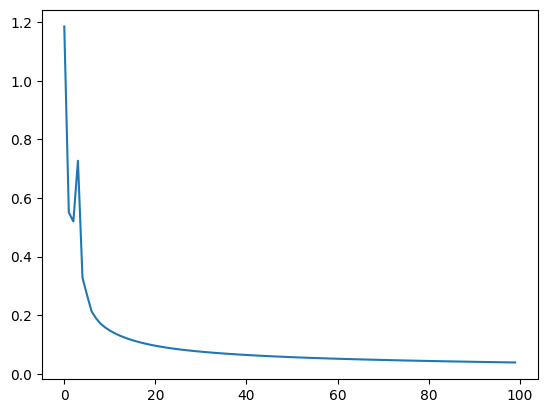

In [ ]:
plt.plot(losses)

In [ ]:
def relu(inputs: torch.Tensor) -> torch.Tensor:
  outputs = inputs.clone()
  outputs[inputs<0] = 0
  return outputs

t = torch.randn(10,1)
print(t, t.shape)
o = relu(t)
print(t,o)

tensor([[ 1.1222],
        [ 0.6486],
        [-1.1439],
        [-0.9147],
        [-0.2365],
        [ 3.0778],
        [ 1.8096],
        [ 1.4941],
        [-0.1413],
        [-1.1303]]) torch.Size([10, 1])
tensor([[ 1.1222],
        [ 0.6486],
        [-1.1439],
        [-0.9147],
        [-0.2365],
        [ 3.0778],
        [ 1.8096],
        [ 1.4941],
        [-0.1413],
        [-1.1303]]) tensor([[1.1222],
        [0.6486],
        [0.0000],
        [0.0000],
        [0.0000],
        [3.0778],
        [1.8096],
        [1.4941],
        [0.0000],
        [0.0000]])


In [ ]:
def softmax(logits: torch.Tensor) -> torch.Tensor:
  num = torch.exp(logits)
  denom = torch.sum(torch.exp(logits))
  sm= num/denom
  return sm


def cross_entropy(logits: torch.FloatTensor, labels: torch.LongTensor) -> torch.FloatTensor:
  output = torch.sum(labels*torch.log(logits), dim=1)
  neg_one = torch.full(output.shape,-1)
  ce = torch.mul(output, neg_one)
  return ce

In [ ]:
print(logits.shape, labels['train'].shape)
print(softmax(logits).shape)

torch.Size([112, 3]) torch.Size([112])
torch.Size([112, 3])


In [ ]:
model = MLP(feature_count,hidden_layer_size, class_count)

optimizer = optim.SGD(model.parameters(),lr=0.9)

criterion = lambda logits, ys: cross_entropy(softmax(logits), ys)
ll = []
for epoch in range(0,100):
  logits = model.forward(features['train'])
  loss = criterion(logits, labels['train'])
  ll.append(loss)
  print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
      epoch,
      accuracy(logits, labels['train'])*100,
      loss.item()
  ))

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

logits = model.forward(features['test'])
test_accuracy = accuracy(logits, labels['test'])*100
print("test accuracy: {:2.2f}".format(test_accuracy))

RuntimeError: ignored